**Fast Food**

This highlights areas in Pittsburgh with the highest concentrations of restaurants and fast-food options, using data from WPRCD. I believe that having a variety of dining choices is a key feature of any vibrant, fun neighborhood in Pittsburgh.

In [1]:
import pandas as pd

df = pd.read_csv("fastfood.tsv", sep="\t")
zip_counts = df['ZIP Code'].value_counts().sort_values(ascending=False)
print(zip_counts.to_string())


ZIP Code
15146    51
15222    46
15237    44
15213    38
15205    36
15219    27
15236    25
15235    22
15102    21
15217    20
15108    19
15203    19
15017    19
15238    18
15090    18
15122    16
15120    16
15084    15
15241    15
15220    15
15044    14
15202    13
15137    13
15227    12
15221    12
15136    12
15232    12
15234    11
15206    11
15231    11
15210    11
15216    11
15143    10
15101    10
15275    10
15106    10
15065    10
15212     9
15239     9
15131     9
15132     9
15229     8
15218     7
15228     7
15147     7
15226     7
15224     6
15223     5
15201     5
15215     4
15233     4
15034     4
16046     3
15123     3
15071     3
15037     3
15139     3
15209     3
15116     3
15110     2
15024     2
15025     2
15145     2
15211     2
15056     2
15126     1
15225     1
15003     1
15148     1
15282     1
15208     1
15144     1
15076     1
15129     1
15207     1
15140     1
15045     1


This shows the number of restaurants in different zip codes. Since neighborhood data was missing, I sorted by zip code.


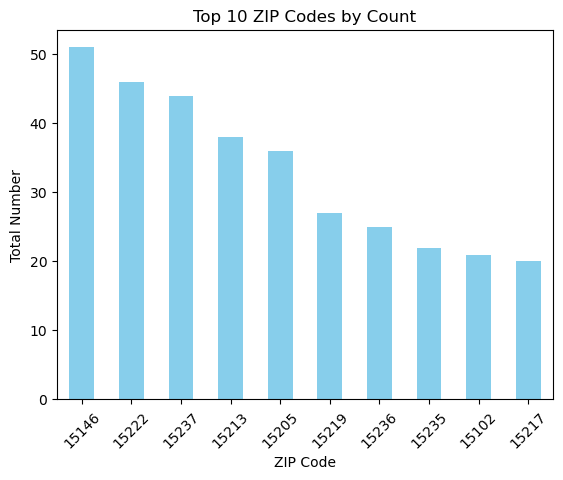

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fastfood.tsv", sep="\t")
zip_counts = df['ZIP Code'].value_counts().sort_values(ascending=False).head(10)

zip_counts.plot(kind='bar', color='skyblue')
plt.xlabel("ZIP Code")
plt.ylabel("Total Number")
plt.title("Top 10 ZIP Codes by Count")
plt.xticks(rotation=45)
plt.show()


This graph is intended to visualize the distribution of restaurants across different zip codes, providing insight into the variation based on zip code type.

In [6]:
import folium
import requests
import pandas as pd

# Step 1: Load the Data
file_path = "fastfood.tsv"
df = pd.read_csv(file_path, sep="\t")

# Step 2: Identify Top 10 ZIP Codes
zip_counts = (
    df['ZIP Code']
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
)

# Step 3: Fetch GeoJSON Data for U.S. ZIP Codes
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us/zip-code-area.geojson'
response = requests.get(geojson_url)

if response.status_code == 200:
    geojson_data = response.json()
else:
    print(f"Failed to fetch GeoJSON data. Status code: {response.status_code}")
    geojson_data = None

# Step 4: Create and Populate the Map
if geojson_data:
    # Define map properties
    map_center = [37.0902, -95.7129]  # Center of the U.S.
    m = folium.Map(location=map_center, zoom_start=5)

    # Add the top 10 ZIP codes to the map
    for zip_code, count in zip_counts.items():
        # Search for the ZIP code in GeoJSON data
        feature = next(
            (f for f in geojson_data['features'] 
             if f['properties']['postalCode'] == str(zip_code)),
            None
        )

        if feature:
            polygon = feature['geometry']
            color = (
                'red' if count >= 100 else
                'orange' if count >= 50 else
                'blue'
            )

            # Add the ZIP code to the map
            folium.GeoJson(
                feature,
                style_function=lambda feature, color=color: {
                    'fillColor': color,
                    'color': 'black',
                    'weight': 1,
                    'fillOpacity': 0.6
                },
                tooltip=folium.Tooltip(f"ZIP Code: {zip_code}, Count: {count}")
            ).add_to(m)

    # Step 5: Save the Map
    map_filename = 'top_10_zip_codes_map.html'
    m.save(map_filename)
    print(f"Map has been saved as '{map_filename}'. Open this file in your browser to view the map.")


ModuleNotFoundError: No module named 'folium'

This generates a map highlighting the neighborhoods in Pittsburgh with the highest concentration of restaurants. The file is called 'top_10_zip_codes_map.html'

**Conclusion**

 I don’t currently have a personal favorite neighborhood in Pittsburgh. However, in my data analysis, Braddock Hills emerged as the top neighborhood for most food options. This result was unexpected.

<h1 style="text-align: center;">Parks</h1>

Parks are an essential part of neighborhood life, offering spaces for recreation, relaxation, and community gatherings. My analysis will focus on how the distribution of parks contribute to the fun factor of Pittsburgh's neighborhoods.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

parks = pd.read_csv(r'C:\Users\vivia\OneDrive\Desktop\Pittsburgh_Neighborhood_Project\city_pitt_parks.csv')


In [77]:
total_parks = len(parks)
print(f'Total number of parks in Pittsburgh: {total_parks}')

Total number of parks in Pittsburgh: 153


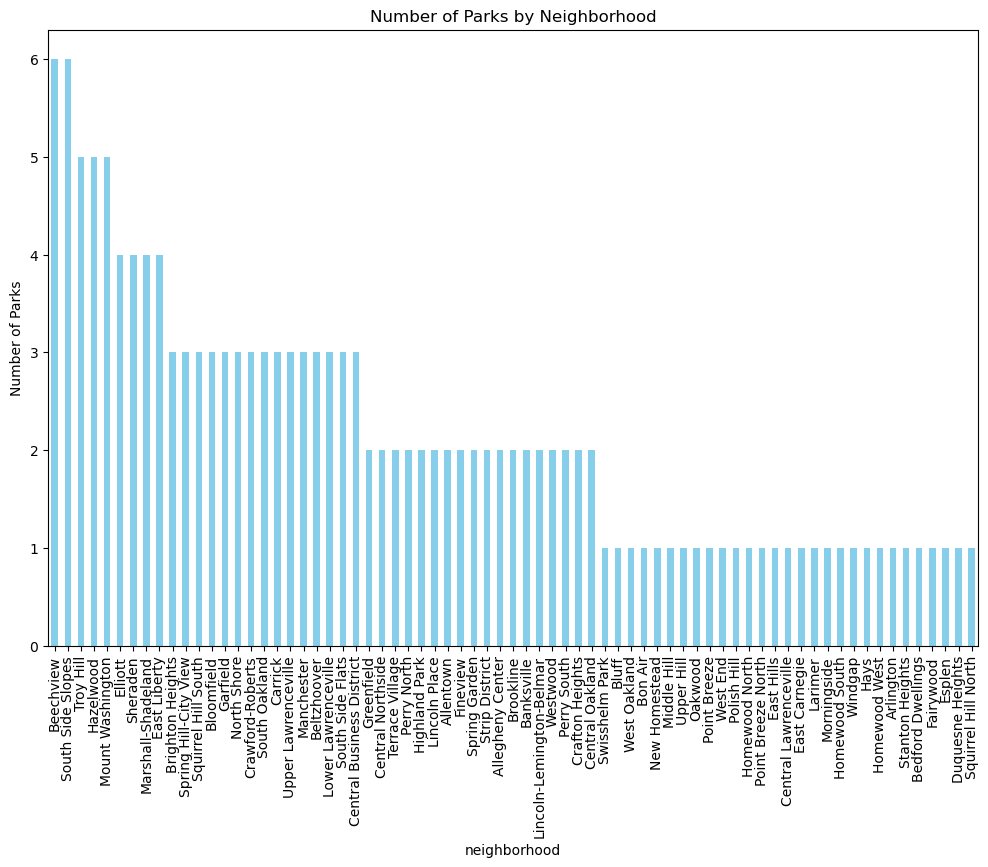

In [78]:
plt.figure(figsize=(12, 8))
neighborhood_parks.plot(kind='bar', color='skyblue')
plt.title('Number of Parks by Neighborhood')  
plt.xlabel('neighborhood')
plt.ylabel('Number of Parks') 
plt.xticks(rotation=90) 
plt.show() 

This bar graph shows the number of parks in each neighborhood.

In [79]:
ranked_neighborhoods = neighborhood_parks.sort_values(ascending=False)
print(ranked_neighborhoods.head(10))

neighborhood
Beechview             6
South Side Slopes     6
Troy Hill             5
Hazelwood             5
Mount Washington      5
Elliott               4
Sheraden              4
Marshall-Shadeland    4
East Liberty          4
Carrick               3
Name: count, dtype: int64


This list shows the ranking of the neighborhoods based on the number of parks.

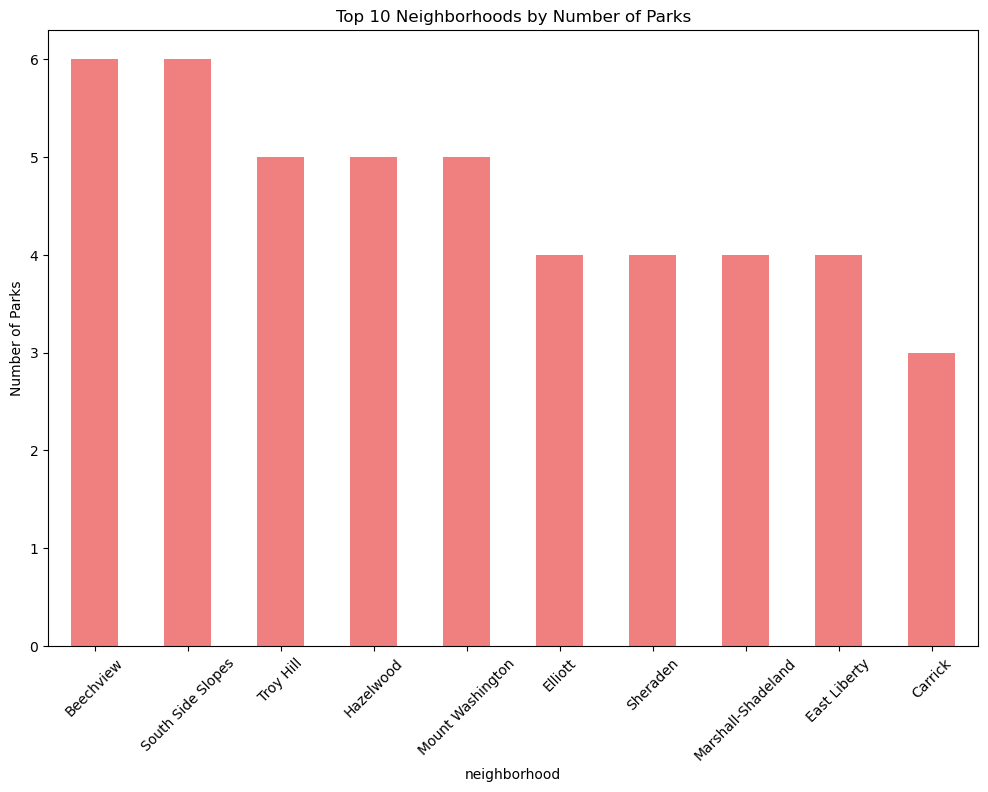

In [80]:
plt.figure(figsize=(12, 8))
ranked_neighborhoods.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Neighborhoods by Number of Parks')
plt.xlabel('neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45)
plt.show()

This displays a bar graph of the top 10 neighborhoods with the most parks.

<h1 style="text-align: center;">Most Fun Neighborhood!!!</h1>

1. Beachview
2. South Side Slopes

Beechview and South Side Slopes stand out as the neighborhoods with the most parks in Pittsburgh, each having 6. More parks provide more opportunities for outdoor activities and community events, making these neighborhoods some of the most fun in the city.

<h1 style="text-align: center;">Conclusion</h1>

My person favorite neighborhood is Squirrel Hill South because Schenley Park is located here. It’s a great spot for outdoor activities. The park is also close to the University of Pittsburgh campus which makes it a convenient spot for students and residents.